In [2]:
# Initial imports
import os
import requests
import pandas as pd
import json 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# create Bitcoin Variable and formatted content 
my_btc_data = requests.get(btc_url).json() 
print(json.dumps(my_btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18525062,
            "total_supply": 18525062,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 12926.29,
                    "volume_24h": 21954295605,
                    "market_cap": 239309287478,
                    "percentage_change_1h": 0.201240005780214,
                    "percentage_change_24h": -1.71432424374274,
                    "percentage_change_7d": 12.4456602761001,
                    "percent_change_1h": 0.201240005780214,
                    "percent_change_24h": -1.71432424374274,
                    "percent_change_7d": 12.4456602761001
                },
                "CAD": {
                    "price": 16969.633512,
                    "volume_24h": 28821599270.244,
                   

In [7]:
# create Ethereum Variable and formatted content
my_eth_data = requests.get(eth_url).json() 
print(json.dumps(my_eth_data, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113129873,
            "total_supply": 113129873,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 408.69,
                    "volume_24h": 10113480436,
                    "market_cap": 46261458362,
                    "percentage_change_1h": 0.089575130540902,
                    "percentage_change_24h": -2.38010612222488,
                    "percentage_change_7d": 8.3600900150796,
                    "percent_change_1h": 0.089575130540902,
                    "percent_change_24h": -2.38010612222488,
                    "percent_change_7d": 8.3600900150796
                },
                "CAD": {
                    "price": 536.528232,
                    "volume_24h": 13276977116.3808,
                    "m

In [8]:
# Fetch current BTC price    
btc_price = my_btc_data["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
eth_price = my_eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15511.55
The current value of your 5.3 ETH is $2166.06


In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
start = pd.Timestamp("2020-10-19", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
current_closing_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Preview DataFrame
current_closing_prices_df

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071  348.62   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-19 00:00:00-04:00  349.33  341.04  342.02  51690440

In [12]:
# Pick AGG and SPY close prices
agg_close_price = current_closing_prices_df.iloc[0,3]
spy_close_price = current_closing_prices_df.iloc [0,8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17101.00
The current value of your 200 AGG shares is $23557.40


In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
df_savings = pd.DataFrame({'amount':[crypto, shares]}, index=['crypto', 'shares'])
#Display savings DataFrame
display(df_savings)

,amount
crypto,17677.605
shares,40658.400


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D30F7C308>],
      dtype=object)

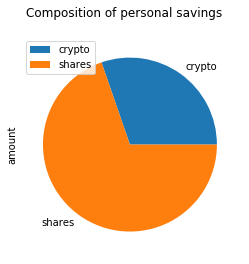

In [27]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots=True, title = 'Composition of personal savings')

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = emergency_fund + crypto + shares

# Validate saving health
if total_amount_savings > emergency_fund:
    print('Congradualtions! you have enough money in your emergency fund')
elif total_amount_savings == emergency_fund:
    print('Congradultions! you have 3 times your monthly expenses')
else:
    print('you need to start saving more')

    
    

Congradualtions! you have enough money in your emergency fund


In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Drop time component for the date
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                         SPY          \
              open      high      low   close   volume    open    high   
2015-08-07  109.14  109.2750  109.035  109.21  2041167  208.16  208.34   
2015-08-10  109.15  109.1700  108.920  109.06  1149778  209.28  210.67   
2015-08-11  109.42  109.5765  109.284  109.42  1420907  208.98  209.47   
2015-08-12  109.55  109.7100  109.350  109.36  1468979  207.11  209.14   
2015-08-13  109.36  109.3651  109.110  109.15  1465173  208.73  209.55   

                                       
               low   close     volume  
2015-08-07  206.87  207.93   87669782  
2015-08-10  209.28  210.58   66755890  
2015-08-11  207.76  208.63   88424557  
2015-08-12  205.36  208.89  136171450  
2015-08-13  208.01  208.63   77197796

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_return = MCSimulation(
    portfolio_data = df_stock_data ,
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_30_return.portfolio_data.head()

AGG                                                      SPY  \
              open      high      low   close   volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [25]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_30_return.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008483,0.992384,0.991350,0.982384,0.990476,1.010624,1.002183,0.991230,0.997537,0.997029,...,1.002863,1.000481,1.007743,1.009413,1.000189,1.000002,1.002175,1.005297,1.009815,0.994724
2,1.004622,0.993893,0.997657,0.982857,0.985728,1.005226,1.003976,0.994524,0.994060,0.989820,...,0.995704,1.003669,1.007613,1.004020,1.000952,0.993481,1.005988,1.004995,1.008960,1.003055
3,1.008990,0.993904,1.001315,0.981523,0.981477,1.007447,1.006670,0.989549,0.991673,0.984648,...,0.995568,0.995333,0.992539,1.006698,1.000745,0.993662,1.006228,1.010193,1.011453,1.006263
4,1.005787,0.996311,0.993053,0.983821,0.983313,1.010297,1.012067,0.989257,0.977733,0.993003,...,0.995280,0.988075,0.987702,1.008008,1.010954,0.995761,0.996882,1.009252,0.997906,0.997704
5,1.011365,0.998172,0.995319,0.986335,0.987425,1.005246,1.004696,0.993609,0.985283,0.995303,...,0.984133,0.992399,0.980246,1.012761,1.010377,1.001729,1.002256,1.001302,1.011150,1.001711
6,1.016027,0.997893,0.997491,0.990937,0.980951,1.007414,1.000996,0.984764,1.003003,0.991950,...,0.986211,0.997382,0.982760,1.008139,1.011134,0.988484,0.990220,1.008960,1.011963,0.995888
7,1.005340,0.999455,0.990496,0.984502,0.982289,1.006265,1.007407,0.987079,1.009268,0.996405,...,0.986696,0.992203,0.991315,1.004779,1.017260,0.994952,0.994195,1.016243,1.013890,0.998532
8,1.004481,0.997625,0.990650,0.989502,0.976040,1.008544,1.000649,0.973666,1.000422,1.004628,...,0.992450,0.996667,1.003012,1.006645,1.019938,1.005280,0.987007,1.027531,1.016723,0.997102
9,1.002240,1.000216,0.981580,0.997264,0.973247,1.009719,1.000264,0.972641,1.003609,1.005763,...,0.992158,1.008745,1.002849,1.003531,1.023967,1.012846,0.981636,1.020279,1.018221,0.989851


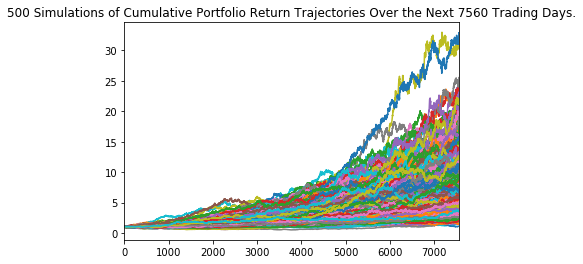

In [28]:
# Plot simulation outcomes
line_plot =MC_30_return.plot_simulation()

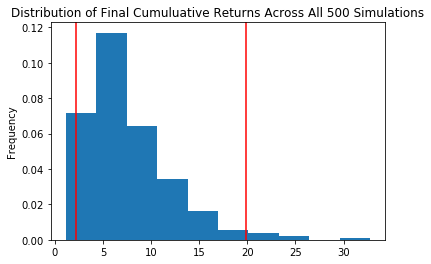

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_return.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_30_return.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              7.623711
std               4.531573
min               1.127796
25%               4.473917
50%               6.543829
75%               9.757504
max              32.769410
95% CI Lower      2.154283
95% CI Upper     19.823727
Name: 7560, dtype: float64


In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43085.66 and $396474.54


In [34]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(even_tbl[8]*initial_investment_2,2)
ci_upper_2 = round(even_tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64628.49 and $594711.82
